[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ravi.chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ravi.chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


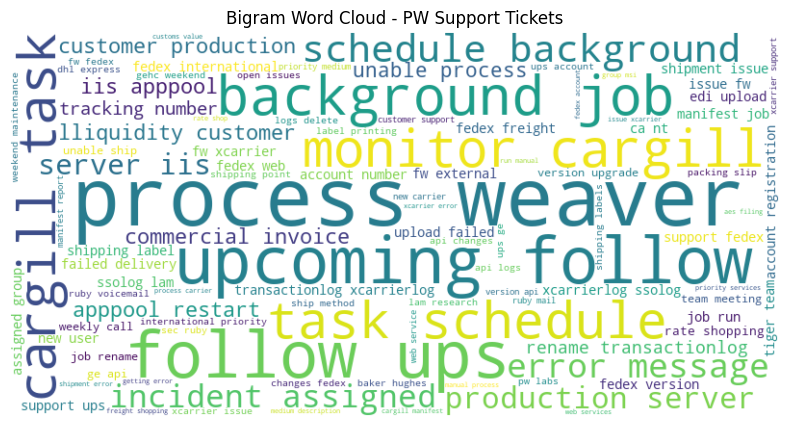

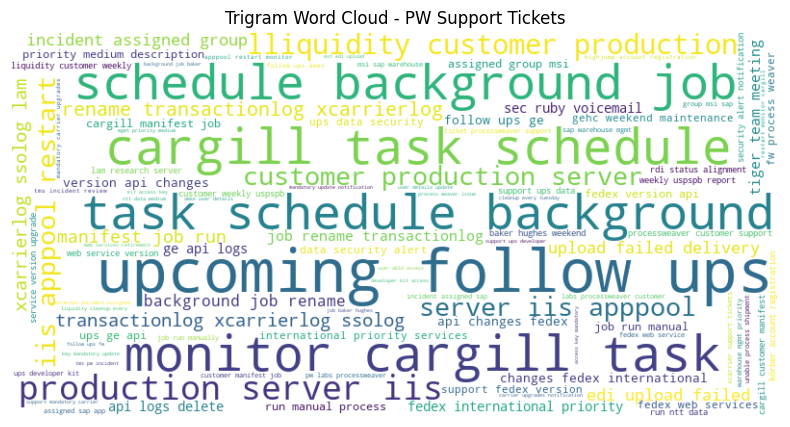

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

# Load ticket summary data (assuming CSV)
df = pd.read_csv(".data\\tickets.csv")
summaries = " ".join(df["Summary"].dropna())

# Preprocessing
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))

# Tokenization and cleaning
words = word_tokenize(summaries.lower())  # Convert to lowercase & tokenize
words = [re.sub(r'\W+', '', word) for word in words]  # Remove special characters
words = [word for word in words if word not in stop_words and word.isalpha()]  # Remove stopwords & non-alphabetic tokens

# Generate Bigrams and Trigrams
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Convert to strings for WordCloud
bigram_phrases = [" ".join(bigram) for bigram in bigrams]
trigram_phrases = [" ".join(trigram) for trigram in trigrams]

# Count frequency
bigram_freq = Counter(bigram_phrases)
trigram_freq = Counter(trigram_phrases)

top_bigrams = dict(bigram_freq.most_common(100))
top_trigrams = dict(trigram_freq.most_common(100))

# Write top 100 bigrams to CSV
bigrams_df = pd.DataFrame(list(top_bigrams.items()), columns=['Bigram', 'Count'])
bigrams_df.to_csv('.output/top_bigrams.csv', index=False)

# Write top 100 trigrams to CSV
trigrams_df = pd.DataFrame(list(top_trigrams.items()), columns=['Trigram', 'Count'])
trigrams_df.to_csv('.output/top_trigrams.csv', index=False)

# Select most common phrases
#top_bigrams = " ".join([phrase for phrase, _ in bigram_freq.most_common(150)])
#top_trigrams = " ".join([phrase for phrase, _ in trigram_freq.most_common(150)])

# Generate Word Cloud for Bigrams
#wordcloud_bigrams = WordCloud(width=800, height=400, background_color="white").generate(top_bigrams)
wordcloud_bigrams = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_bigrams)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud - PW Support Tickets")
plt.show()

# Generate Word Cloud for Trigrams
#wordcloud_trigrams = WordCloud(width=800, height=400, background_color="white").generate(top_trigrams)
wordcloud_trigrams = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_trigrams)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trigrams, interpolation="bilinear")
plt.axis("off")
plt.title("Trigram Word Cloud - PW Support Tickets")
plt.show()
